# Lab 2

# Content
* [Data Preparation](#data-preparation)
    - [Part 1. Data Processing](#data-preparation1)
    - [Part 2. Final Datasets](#data-preparation2)
* [Modeling and Evaluation](#model-and-evaluation)
    - [Part 1. Evaluation Metrics](#model-and-evaluation1)
    - [Part 2. Train and Test Splits](#model-and-evaluation2)
    - [Part 3. Models for Tasks](#model-and-evaluation3)
        - [Part 3.a. Models for Classification](#model-and-evaluation3a)
        - [Part 3.b. Models for Regression](#model-and-evaluation3b)
    - [Part 4. Model Analysis with Visualization](#model-and-evaluation4)
    - [Part 5. Model Comparison](#model-and-evaluation5)
    - [Part 6. Feature Importance](#model-and-evaluation6)
* [Deployment](#deployment)
* [Exceptional Work](#exceptional-work)

# Rubric

@class Here is the rubric for Lab 2.  You must have these EXACT sections in your submission, if you want me to grade it!  You may have as many subsections as you feel are necessary for each section. Lab 2 is due Sunday 3/14/21 by 11:59 PM.



 

Category 	Available 	Requirements
Total Points 	100	



Data Preparation Part 1	10	Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

Data Preparation Part 2	5	Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

Modeling and Evaluation 1	10	Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

Modeling and Evaluation 2	10	Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

Modeling and Evaluation 3	20	Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

Modeling and Evaluation 4	10	Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

Modeling and Evaluation 5	10	Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

Modeling and Evaluation 6	10	Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

Deployment	5	How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 

Exceptional Work	10	You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

# Data Preparation <a id='data-preparation'/>

### Part 1. Data Processing <a id='data-preparation1'/>

##### Data Importing and Cleaning

In [1]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('https://raw.githubusercontent.com/olmosjorge28/DS7331_ML1_ASSINGMENTS/main/hotel_bookings.csv') # read in the csv file
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15


In [2]:
# data info
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Upon initial inspection of the 31 attributes, we noticed the following,
1. Total of 7 attributes appears to have some missing data.
We decided to replace the missing value “__nan__ and “__Undefined__” with __MODE__ as they appear to be accidental
2. We decided to __remove__ “__agent__” and “__company__” attributes as they do not provide any valuable information for analysis
3. we decided to replace '__Undefined__' with '__SC__' under Meal attribute as they are synonymous. 
4. We classify the non-categorical attributes that are above and below 1.5 times the interquartile range of the dataset as __outliers__. 

Below is a list of all the attributes with missing values and the counts:
* agent- 16340
* company- 112593
* children- 4
* country- 488
* market_segment - 2
* meal - 1169
* distribution_channel – 5

There's an association between the distribution channel type and the agent and company attributes. 
1. If the distribution channel is from a Traveling Agent (__TA__) or Tour Operator (__TO__), then the agency company is supplied in the agent column. 
2. if the distribution channel is __Corporate__, then the company associated with the booking is populated under the company attribute. 
3. If the distribution is neither __Corporate__, __TA__ or __TO__ than both the __agent and company__ attributes will be __null__. 
4. For the meal attribute during our data investigation, we have found out that '__Undefined__' and '__SC__' are synonymous so we have decided to __replace__ '__Undefined__' with '__SC__'. 


To simplify our data exploration, we decided to __remove__ the __agent and company__ attributes as they don't provide any additional information beyond what already is provided in the distribution channel. 
Data cleaning for the above attributes will be followed. 

In [4]:
import math
from datetime import date


hotel_bookings_transform = hotel_bookings
# removing 'agent','company' and 'country'
hotel_bookings_transform= hotel_bookings_transform.drop(columns=['agent','company', 'country'])

# For the remainder they appear to have been omitted accidentally and we decided to populate the missing values with the mode.
hotel_bookings[['children','country','market_segment','meal','distribution_channel']].mode() 


hotel_bookings_transform['meal']= hotel_bookings_transform['meal'].apply(lambda x: 'SC' if  x == 'Undefined'  else x)
hotel_bookings_transform['children']= hotel_bookings_transform['children'].apply(lambda x: 0 if  math.isnan(x)  else x)
hotel_bookings_transform['market_segment']= hotel_bookings_transform['market_segment'].apply(lambda x: 'Online TA' if  x == 'Undefined'  else x)
hotel_bookings_transform['distribution_channel']= hotel_bookings_transform['distribution_channel'].apply(lambda x: 'TA/TO' if  x == 'Undefined'  else x)

Additionally, the following attributes were __classified as objects__, however they're __categorical__ in nature so we have decided to encode each of these attributes with a corresponding number according to their alphabetical order:

- hotel - ['City Hotel', 'Resort Hotel']
- market_segment - ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA']
- meal - ['BB', 'FB', 'HB', 'SC']
- reservation_status - ['Canceled', 'Check-Out', 'No-Show']
- distribution_channel - ['Corporate', 'Direct', 'GDS', 'TA/TO']
- reserved_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P']
- assigned_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']
- deposit_type - ['No Deposit', 'Non Refund', 'Refundable']
- country - [['ABW','AGO','AIA','ALB','AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO' 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL', 'PRI', 'PRT', 'PRY', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 'SLV', 'SMR', 'SRB', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SYC', 'SYR', 'TGO', 'THA', 'TJK', 'TMP', 'TUN', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR', 'UMI', 'URY', 'USA', 'UZB', 'VEN', 'VGB', 'VNM', 'ZAF', 'ZMB', 'ZWE']]
- customer_type - ['Contract', 'Group', 'Transient', 'Transient-Party']


In [5]:
# Encoding process

hotel_bookings_transform['hotel']=hotel_bookings_transform['hotel'].astype('category').cat.codes
hotel_bookings_transform['market_segment']=hotel_bookings_transform['market_segment'].astype('category').cat.codes
hotel_bookings_transform['meal']=hotel_bookings_transform['meal'].astype('category').cat.codes
hotel_bookings_transform['reservation_status']=hotel_bookings_transform['reservation_status'].astype('category').cat.codes
hotel_bookings_transform['distribution_channel']=hotel_bookings_transform['distribution_channel'].astype('category').cat.codes
hotel_bookings_transform['reserved_room_type']=hotel_bookings_transform['reserved_room_type'].astype('category').cat.codes
hotel_bookings_transform['assigned_room_type']=hotel_bookings_transform['assigned_room_type'].astype('category').cat.codes
hotel_bookings_transform['deposit_type']=hotel_bookings_transform['deposit_type'].astype('category').cat.codes
hotel_bookings_transform['customer_type']=hotel_bookings_transform['customer_type'].astype('category').cat.codes

assign_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}}
hotel_bookings_transform = hotel_bookings_transform.replace(assign_month)

# Convert Date to Ordinal
import datetime as dt
hotel_bookings_transform['reservation_status_date'] = pd.to_datetime(hotel_bookings_transform['reservation_status_date'])
hotel_bookings_transform['reservation_status_date'] = hotel_bookings_transform['reservation_status_date'].map(dt.datetime.toordinal)

hotel_bookings_transform=hotel_bookings_transform.assign(booking_day_of_year = hotel_bookings_transform["arrival_date_year"].astype(str) + '-' + 
hotel_bookings_transform["arrival_date_month"].astype(str) + '-' +hotel_bookings_transform["arrival_date_day_of_month"].astype(str))
hotel_bookings_transform['booking_day_of_year']=pd.to_datetime(hotel_bookings_transform.booking_day_of_year)
hotel_bookings_transform['booking_day_of_year']=hotel_bookings_transform['booking_day_of_year'].map(lambda x: x.toordinal() - date(x.year, 1, 1).toordinal() + 1)


hotel_bookings_transform=hotel_bookings_transform.drop(columns=['arrival_date_year','reservation_status_date'])
#hotel_bookings_transform['booking_date']=hotel_bookings_transform['booking_date'].map(dt.datetime.toordinal)

##### Outlier removal
- First we decided to take a look the simple statistics of the continuous variables to see if they make sense. 
- __adr__ and __lead_time__ had minimum and maximum values that appear as data entry error.  
- __stays_in_week_nights__ and __stays_in_weekend_nights__ had too extreme maximum values when there are only seven days in a week. 
- __days_in_waiting_list__, __total_of_special_requests__ and __required_car_parking_spaces__ had reasonable data distribution. 
- After determining that the 4 continuous features(adr, lead_time, stays_week_nights, stays_weekend_nights) have extreme outliers, the 25% and 75% interquartile range (IQR) was utilized in order to identify and remove the outliers from the dataset. 
- Outliers that are positioned at above and below the 1.5 times the upper and lower limit of IQR are removed. 

In [6]:
# simple statistics of continuous features 
hotel_bookings_transform[['adr', 'lead_time','days_in_waiting_list','total_of_special_requests','required_car_parking_spaces','stays_in_week_nights','stays_in_weekend_nights']].describe()

,adr,lead_time,days_in_waiting_list,total_of_special_requests,required_car_parking_spaces,stays_in_week_nights,stays_in_weekend_nights
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,101.831122,104.011416,2.321149,0.571363,0.062518,2.500302,0.927599
std,50.535790,106.863097,17.594721,0.792798,0.245291,1.908286,0.998613
min,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.290000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,94.575000,69.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,126.000000,160.000000,0.000000,1.000000,0.000000,3.000000,2.000000
max,5400.000000,737.000000,391.000000,5.000000,8.000000,50.000000,19.000000


In [7]:
# 4 features selected that have outliers
cols = ['adr', 'lead_time','stays_in_week_nights','stays_in_weekend_nights'] 

Q1 = hotel_bookings_transform[cols].quantile(0.25)
Q3 = hotel_bookings_transform[cols].quantile(0.75)
IQR = Q3 - Q1

hotel_bookings_transform = hotel_bookings_transform[~((hotel_bookings_transform[cols] < (Q1 - 1.5* IQR)) |(hotel_bookings_transform[cols] > (Q3 + 1.5* IQR))).any(axis=1)]

In [8]:
# dataframe shape after outlier removal
hotel_bookings_transform.shape

(109425, 28)

##### Normalization

In [9]:
X_cls=hotel_bookings_transform.drop(columns=['is_canceled','reservation_status','meal'])
y_cls=hotel_bookings_transform.is_canceled

X_reg=hotel_bookings_transform.drop(columns=['adr','reservation_status','meal'])
y_reg=hotel_bookings_transform.adr

columns_cls = X_cls.columns
columns_reg = X_reg.columns

columns_cls, columns_reg

(Index(['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies',
        'market_segment', 'distribution_channel', 'is_repeated_guest',
        'previous_cancellations', 'previous_bookings_not_canceled',
        'reserved_room_type', 'assigned_room_type', 'booking_changes',
        'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
        'required_car_parking_spaces', 'total_of_special_requests',
        'booking_day_of_year'],
       dtype='object'),
 Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
        'arrival_date_week_number', 'arrival_date_day_of_month',
        'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
        'babies', 'market_segment', 'distribution_channel', 'is_repeated_guest',
        'previous_cancellations', 'previous_bookings_not_canceled',
        'reserved_room_t

In [10]:
from sklearn import preprocessing
scaler_cls = preprocessing.StandardScaler().fit(X_cls)
scaler_reg = preprocessing.StandardScaler().fit(X_reg)

X_cls_scaled = pd.DataFrame(scaler_cls.transform(X_cls),columns=columns_cls)
X_reg_scaled = pd.DataFrame(scaler_reg.transform(X_reg),columns=columns_reg)

In [11]:
X_cls_scaled

,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,booking_day_of_year
0,1.468923,2.670098,0.162061,0.006789,-1.686903,-0.982013,-1.611971,0.266031,-0.239552,-0.079437,...,0.692165,0.413491,4.458505,-0.363223,-0.145555,-0.258425,-2.395267,-0.252738,-0.720113,-0.003609
1,1.468923,-0.945029,0.162061,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,-0.079437,...,-0.558870,0.413491,-0.340534,-0.363223,-0.145555,-0.258425,-0.555304,-0.252738,-0.720113,-0.003609
2,1.468923,-0.880280,0.162061,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.555304,-0.252738,-0.720113,-0.003609
3,1.468923,-0.869489,0.162061,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,0.008951,-0.252738,0.547924,-0.003609
4,1.468923,-0.869489,0.162061,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,0.008951,-0.252738,0.547924,-0.003609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109420,-0.680771,0.749225,0.480567,0.585847,1.735230,1.317388,1.198319,0.266031,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.246191,-0.252738,-0.720113,0.632897
109421,-0.680771,-0.793949,0.480567,0.585847,1.621159,1.317388,1.900891,0.266031,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.036680,-0.252738,1.815962,0.622462
109422,-0.680771,-0.772366,0.480567,0.585847,1.621159,1.317388,1.900891,0.266031,-0.239552,-0.079437,...,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.036680,-0.252738,-0.720113,0.622462
109423,-0.680771,-0.653660,0.480567,0.585847,1.735230,1.317388,1.900891,0.266031,-0.239552,-0.079437,...,1.317682,0.965637,-0.340534,-0.363223,-0.145555,-0.258425,1.473807,-0.252738,4.352036,0.632897


In [12]:
X_reg_scaled

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,booking_day_of_year
0,1.468923,-0.7542,2.670098,0.162061,0.006789,-1.686903,-0.982013,-1.611971,0.266031,-0.239552,...,-0.094611,0.692165,0.413491,4.458505,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113,-0.003609
1,1.468923,-0.7542,-0.945029,0.162061,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,...,-0.094611,-0.558870,0.413491,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113,-0.003609
2,1.468923,-0.7542,-0.880280,0.162061,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113,-0.003609
3,1.468923,-0.7542,-0.869489,0.162061,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,0.547924,-0.003609
4,1.468923,-0.7542,-0.869489,0.162061,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,0.547924,-0.003609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109420,-0.680771,-0.7542,0.749225,0.480567,0.585847,1.735230,1.317388,1.198319,0.266031,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113,0.632897
109421,-0.680771,-0.7542,-0.793949,0.480567,0.585847,1.621159,1.317388,1.900891,0.266031,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,1.815962,0.622462
109422,-0.680771,-0.7542,-0.772366,0.480567,0.585847,1.621159,1.317388,1.900891,0.266031,-0.239552,...,-0.094611,-0.558870,-0.690803,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113,0.622462
109423,-0.680771,-0.7542,-0.653660,0.480567,0.585847,1.735230,1.317388,1.900891,0.266031,-0.239552,...,-0.094611,1.317682,0.965637,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,4.352036,0.632897


Verifying each feature has a mean of zero and the standard deviation should be 1 for classification:

In [13]:
print('classification scaler mean:')
print(X_cls_scaled.mean(axis=0),'\n')
print('classification scaler std:')
print(X_cls_scaled.std(axis=0),'\n')

classification scaler mean:
hotel                             1.353651e-13
lead_time                         2.897664e-16
arrival_date_month                2.358346e-14
arrival_date_week_number          6.551222e-15
arrival_date_day_of_month         1.938530e-16
stays_in_weekend_nights           6.092845e-14
stays_in_week_nights             -5.386664e-14
adults                            1.612851e-14
children                         -1.210227e-14
babies                           -1.689242e-14
market_segment                    3.368001e-14
distribution_channel             -1.324174e-13
is_repeated_guest                 2.881953e-14
previous_cancellations           -2.629231e-14
previous_bookings_not_canceled   -9.483673e-15
reserved_room_type               -5.514433e-15
assigned_room_type                2.527050e-14
booking_changes                  -1.655952e-14
deposit_type                     -1.040636e-13
days_in_waiting_list             -1.006852e-14
customer_type                   

Verifying each feature has a mean of zero and the standard deviation should be 1 for regression:

In [14]:
print('regression scaler mean:')
print(X_reg_scaled.mean(axis=0),'\n')
print('regression scaler std:')
print(X_reg_scaled.std(axis=0),'\n')

regression scaler mean:
hotel                             1.353651e-13
is_canceled                       2.154678e-13
lead_time                         2.897664e-16
arrival_date_month                2.358346e-14
arrival_date_week_number          6.551222e-15
arrival_date_day_of_month         1.938530e-16
stays_in_weekend_nights           6.092845e-14
stays_in_week_nights             -5.386664e-14
adults                            1.612851e-14
children                         -1.210227e-14
babies                           -1.689242e-14
market_segment                    3.368001e-14
distribution_channel             -1.324174e-13
is_repeated_guest                 2.881953e-14
previous_cancellations           -2.629231e-14
previous_bookings_not_canceled   -9.483673e-15
reserved_room_type               -5.514433e-15
assigned_room_type                2.527050e-14
booking_changes                  -1.655952e-14
deposit_type                     -1.040636e-13
days_in_waiting_list             -1.

##### Feature Selection for Classification

In this section we're looking for covariates and removing some of the features that are highly correlated with other features in the dataset.

In [ ]:
correlated_features = []
correlation_matrix = X_cls_scaled.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            
            correlated_features.append([correlation_matrix.columns[j],colname])
            
            
print('Highly correlated feature pairs are: {}'.format(correlated_features))

Droping features chosen from coorelations analysis:

In [ ]:
# Decided to drop the following features from the highly correlated pairs
X_cls_scaled=X_cls_scaled.drop(['distribution_channel', 'arrival_date_month','assigned_room_type','booking_day_of_year'], axis=1)

We are running an RFECV analysis for feature elimination using Random Forest. Each loop in RFECV attempts to elimante dependencies and collinearities that may exist and only keeps those features that generate the highest test score ('accuracy'). The process is reapeated until it reaches the predetermined number of features for selection.

In [ ]:
# Using randomforest to run RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier(random_state=10)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(3), scoring='accuracy')
rfecv.fit(X_cls_scaled, y_cls)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
# Plotting RFE result

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('RFE with Cross Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=2)

plt.show()

In [ ]:
# Identifying which feature is Selected(= identified as True)

print(X_cls_scaled.columns[np.where(rfecv.support_ == True)[0]])

In [ ]:
# Dropping those features that are identified as not important
X_cls_sel=X_cls_scaled[X_cls_scaled.columns[np.where(rfecv.support_ == True)[0]]]

In [ ]:
# Plotting features in the order of importance 

dset = pd.DataFrame()
dset['attr'] = X_cls_sel.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)


plt.figure(figsize=(8, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

##### Feature Selection for Regression

In [15]:
correlated_features = []
correlation_matrix = X_reg_scaled.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            
            correlated_features.append([correlation_matrix.columns[j],colname])
            
            
print('Highly correlated feature pairs are: {}'.format(correlated_features))

Highly correlated feature pairs are: [['arrival_date_month', 'arrival_date_week_number'], ['market_segment', 'distribution_channel'], ['reserved_room_type', 'assigned_room_type'], ['arrival_date_month', 'booking_day_of_year'], ['arrival_date_week_number', 'booking_day_of_year']]


In [16]:
X_reg_scaled=X_reg_scaled.drop(['distribution_channel', 'arrival_date_month','assigned_room_type','booking_day_of_year'], axis=1)

In [17]:
# Using randomforest to run RFE

from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import ShuffleSplit 
from sklearn.ensemble import RandomForestRegressor

# rfc = linear_model.Lasso(alpha=0.1, random_state=10)
rfc = RandomForestRegressor(random_state=10)
# rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(3), scoring='r2')

rfecv = RFECV(estimator=rfc, step=1, cv=ShuffleSplit(n_splits=5, test_size=0.20, random_state=10), scoring='r2')

rfecv.fit(X_reg_scaled, y_reg)

KeyboardInterrupt: 

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
# Plotting RFE result

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('RFE with Cross Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=2)

plt.show()

In [ ]:
# Identifying which feature is Selected(= identified as True)

print(X_reg_scaled.columns[np.where(rfecv.support_ == True)[0]])

In [ ]:
# Dropping those features that are identified as not important
X_reg_sel=X_reg_scaled[X_reg_scaled.columns[np.where(rfecv.support_ == True)[0]]]

In [ ]:
# Plotting features in the order of importance 

dset = pd.DataFrame()
dset['attr'] = X_reg_sel.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)


plt.figure(figsize=(8, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

### Part 2. Final Datasets <a id='data-preparation2'/>

We have two separate dataset for classification and regression as the output of the Recursive feature engineering (RFE) will be different based upon the different target variable. 
- Dataset for __classification__ had a total of 13 features selected. 
- Dataset for __regression__ had a total of 19 features selected. 

##### Dataset for Classification

In [136]:
X_cls_sel.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,total_of_special_requests
0,2.670098,0.006789,-1.686903,-0.982013,-1.611971,-1.511410,-0.105015,0.692165,4.458505,-0.363223,-0.258425,-2.395267,-0.720113
1,-0.945029,0.006789,-1.686903,-0.982013,-0.909399,-1.511410,-0.105015,-0.558870,-0.340534,-0.363223,-0.258425,-0.555304,-0.720113
2,-0.880280,0.006789,-1.686903,-0.982013,-0.909399,-2.293503,-0.105015,-0.558870,-0.340534,-0.363223,-0.258425,-0.555304,-0.720113
3,-0.869489,0.006789,-1.686903,-0.982013,-0.206826,0.834868,-0.105015,-0.558870,-0.340534,-0.363223,-0.258425,0.008951,0.547924
4,-0.869489,0.006789,-1.686903,-0.982013,-0.206826,0.834868,-0.105015,-0.558870,-0.340534,-0.363223,-0.258425,0.008951,0.547924


    For Classification, we ran RFECV with Random forest and extract below features:
- lead_time
- deposit_type
- adr
- arrival_date_week_number
- arrival_date_day_of_month
- market_segment
- total_of_special_requests
- stays_in_week_nights
- previous_cancellations
- stays_in_weekends_nights
- customer_type
- reserved_room_type
- booking_changes   

##### Dataset for Regression

In [135]:
X_reg_sel.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,1.468923,-0.7542,2.670098,0.006789,-1.686903,-0.982013,-1.611971,0.266031,-0.239552,-0.079437,...,-0.187073,-0.105015,-0.094611,0.692165,4.458505,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113
1,1.468923,-0.7542,-0.945029,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,-0.079437,...,-0.187073,-0.105015,-0.094611,-0.558870,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113
2,1.468923,-0.7542,-0.880280,0.006789,-1.686903,-0.982013,-0.909399,-1.433948,-0.239552,-0.079437,...,-0.187073,-0.105015,-0.094611,-0.558870,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,-0.720113
3,1.468923,-0.7542,-0.869489,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,-0.079437,...,-0.187073,-0.105015,-0.094611,-0.558870,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,0.547924
4,1.468923,-0.7542,-0.869489,0.006789,-1.686903,-0.982013,-0.206826,0.266031,-0.239552,-0.079437,...,-0.187073,-0.105015,-0.094611,-0.558870,-0.340534,-0.363223,-0.145555,-0.258425,-0.252738,0.547924


    For Regression, we ran RFECV with Random Regressor and extract below features
- arrival_date_week_number
- reserved_room_type
- lead_time
- hotel
- market_segment
- arrival_date_day_of_month
- children
- adults
- stays_in_week_nights
- stays_in_weekends_nights
- booking_changes
- total_of_special_requests
- days_in_waiting_list
- customer_type
- is_canceled
- deposit_type
- previous_cancellations
- is_repeated_guest
- required_car_parking_spaces

# Modeling and Evaluation <a id='model-and-evaluation'/>

### Part 1: Evaluation Metrics <a id='model-and-evaluation1'/>

*Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.*

#### Classification model
    1.Classification evaluation metric is quite different from regression performance metric.
    2.Classification is to identify which class of the new observation belongs to. 
    3.Commonly used classification evaluation metrics are;
        a.Accuracy
        b.Precision and recall
        c.F1-score
        d.AUC_ROC

   __Methodology we chose__: 
        For our classification models we have a binary target so we're looking to use __f-score__ as it is best suited for binary classifications. We will also be looking at the overall acuracy with __ROC curve__ to compare which has predictions after taking into account the f-score.
    
    -  The accuracy number is not the best measurement because it is subject to data imbalance
    -  Recall and Precision are subject to Type I and Type II errors
    -  Type I Error is Prediction is Positive but result is Negative
    -  Type II Error is Prediction is Negative but result is Positive
    -  F-1 score is the harmonic mean of the Recall and Precision thus will be a good candidate for classification. 
    -  Area Under the Curve (AUC) is plotted between True Positive (TP) and False Positive (FP).
    -  If the classification model AUC is less than 0.5, then the model is worse than random estimation. Therefore,          maximize the AUC will give a reliable evaluation of the classification model 

#### Regression model
    1.Regression measures the relationships between a certain number of features (independent variables ) and the target variables(dependent variables.
    2.Commonly used regression evaluation metric are;
        a.Mean Absolute Error (MAE)
        b.Mean Square Error ( MSE)
        c.Roof Mean Square Error (RMSE)
        d.R-Squared
        e.Adjusted R-Squared

 __Methodology we chose__: 
    We chose to use __Roof Mean Square Error (RMSE)__
    
    -  The essence of Regression model is the measurement of errors on prediction.
    -  MSE will inflate the error terms if the error is large.
    -  MSE should be used for the model training. 
    -  RMSE should be used for the regression prediction model as the result is on the same scale as predicted original unit due to the Root of the Square. 


### Part 2: Train and Test Splits <a id='model-and-evaluation2'/>

*Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.*

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit 

cv_cls = StratifiedShuffleSplit(n_splits=10, test_size= 0.2, random_state=10)

    We use training and testing splits with StratifiedShuffleSplit for Classification. StratifiedShuffleSplit is good when there are imbalance weight of classes. Our target, is_canceled, feature has more weight of positive, non-canceled, then the negative, canceled, so we choosed the StratifiedShuffleSplit. We applied 10 folds and 80% train and 20% test size.

In [54]:
from sklearn.model_selection import TimeSeriesSplit

cv_reg = TimeSeriesSplit(max_train_size=11000, n_splits=10)

    We use training and testing splits with TimeSeriesSplit because our dataset is timeseries data from 2015 to 2017. Since it is timeseries data, test indices must be higher than before in each split. In this case, shuffling in cross validator is not appropriate to use. Thus we use TimeSeriesSplit with 10 splits and we set max size of train to be 11000, approximately 10% of total data. 

### Part 3. Models for Tasks

#### Part 3.a: Models for Classification <a id='model-and-evaluation3a'/>

*Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!*

##### KNN

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier



clf_knn = KNeighborsClassifier(n_neighbors=3)

yhat = np.zeros(y_cls.shape) # we will fill this with predictions

for train_indices, test_indices in cv_cls.split(X_cls_sel,y_cls): 
    X_train = X_cls_sel.iloc[train_indices]
    y_train = y_cls.iloc[train_indices]
    
    X_test = X_cls_sel.iloc[test_indices]
    y_test = y_cls.iloc[test_indices]
    clf_knn.fit(X_train,y_train)
    yhat[test_indices] = clf_knn.predict(X_test)

total_accuracy = mt.accuracy_score(y_cls, yhat)
print ('KNN accuracy', total_accuracy)

KNN accuracy 0.7929814941740918


##### Random Forest

In [56]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()

Accuracy 0.8361891706648389


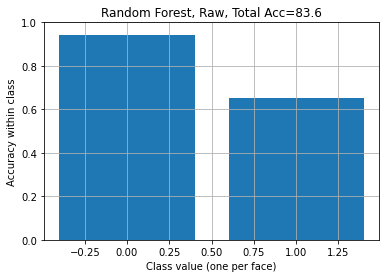

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True)

yhat = np.zeros(y_cls.shape) # we will fill this with predictions

# now iterate through and get predictions, saved to the correct row in yhat
for train_indices, test_indices in cv_cls.split(X_cls_sel,y_cls): 
    X_train = X_cls_sel.iloc[train_indices]
    y_train = y_cls.iloc[train_indices]
    
    X_test = X_cls_sel.iloc[test_indices]
    y_test = y_cls.iloc[test_indices]
    clf_rf.fit(X_train,y_train)
    yhat[test_indices] = clf_rf.predict(X_test)
    
total_accuracy = mt.accuracy_score(y_cls, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y_cls,yhat,title="Random Forest, Raw")

##### Logistic Regression

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics as mt
from sklearn.model_selection import cross_val_score

for train_indices, test_indices in cv_cls.split(X_cls_sel,y_cls): 
    X_train = X_cls_sel.iloc[train_indices]
    y_train = y_cls.iloc[train_indices]
    
    X_test = X_cls_sel.iloc[test_indices]
    y_test = y_cls.iloc[test_indices]
    
clf_logreg = LogisticRegression(random_state=10).fit(X_train,y_train)


print("Training set score: {:.3f}".format(clf_logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(clf_logreg.score(X_test,y_test)))

import statsmodels.api as sm
y_cls_list = list(y_cls)
logit_model=sm.Logit(y_cls_list,X_cls_sel)
result=logit_model.fit()
print(result.summary())

Training set score: 0.789
Test set score: 0.784
Optimization terminated successfully.
         Current function value: 0.485737
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               109425
Model:                          Logit   Df Residuals:                   109412
Method:                           MLE   Df Model:                           12
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                  0.2583
Time:                        16:38:50   Log-Likelihood:                -53152.
converged:                       True   LL-Null:                       -71661.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
lead_time                     

##### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
from sklearn import metrics as mt
from sklearn import tree

In [ ]:
y_cls=hotel_bookings_transform.is_canceled

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=10)

yhat = np.zeros(y_cls.shape) # we will fill this with predictions

for train_indices, test_indices in cv_cls.split(X_cls_sel,y_cls): 
    X_train = X_cls_sel.iloc[train_indices]
    y_train = y_cls.iloc[train_indices]
    
    X_test = X_cls_sel.iloc[test_indices]
    y_test = y_cls.iloc[test_indices]
    clf_dt.fit(X_train,y_train)
    yhat[test_indices] = clf_dt.predict(X_test)

In [ ]:
total_accuracy = mt.accuracy_score(y_cls, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y_cls,yhat,title="Decision Tree")

In [ ]:
# Visualizing tree using only the top 4 branches.
clf_dt2 = tree.DecisionTreeClassifier(max_depth=3)  # set hyperparameter
clf_dt2.fit(X_train, y_train)

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf_dt2, fontsize=8, filled=True,feature_names = list(X_train.columns),class_names = y_train.columns)
plt.show()


##### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()

yhat = np.zeros(y_cls.shape) # we will fill this with predictions

for train_indices, test_indices in cv_cls.split(X_cls_sel,y_cls): 
    X_train = X_cls_sel.iloc[train_indices]
    y_train = y_cls.iloc[train_indices]
    
    X_test = X_cls_sel.iloc[test_indices]
    y_test = y_cls.iloc[test_indices]
    clf_nb.fit(X_train,y_train)
    yhat[test_indices] = clf_nb.predict(X_test)

In [ ]:
total_accuracy = mt.accuracy_score(y_cls, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y_cls,yhat,title="Naive Bayes")

#### Part 3.b: Models for Regression <a id='model-and-evaluation3b'/> 

In [106]:
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    
    meanScores = {'MAE': maeAvg, 'MAPE': mape_avg, 'RMSE': RMSEavg}
    return scoresResults, meanScores

In [107]:

#Use mean absolute error (MAE) to score the regression models created 
#(the scale of MAE is identical to the response variable)
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               }

##### Support Vector Regression

In [108]:
#Create a Linear regression object and perform a grid search to find the best parameters
from sklearn.svm import SVR
reg = SVR()

#Set up SVR parameters to test (WARNING: Creates 80 models!!!) 
costs = [0.001, 0.1]
defGamma = 1 / X_reg_sel.shape[1]  #This is the default value for the gamma parameter
gammas = [defGamma, 0.1]
kernels = ['rbf','linear']
parameters = {'C': costs, 'gamma' : gammas, 'kernel': kernels}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
svr = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_reg # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
svr.fit(X_reg_sel, y_reg)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:  2.8min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=11000, n_splits=10),
             estimator=SVR(), n_jobs=8,
             param_grid={'C': [0.001, 0.1],
                         'gamma': [0.047619047619047616, 0.1],
                         'kernel': ['rbf', 'linear']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [109]:
#Display the best estimator parameters
svr.best_estimator_

SVR(C=0.1, gamma=0.047619047619047616)

In [110]:
from sklearn.svm import SVR

#Create a regression estimator with best parameters for cross validation
# regEstimator = SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
#                    gamma=0.047619047619047616, kernel='rbf', max_iter=-1, shrinking=True,
#                    tol=0.001, verbose=False)

regEstimator = svr.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
estimateResult, svrMeanScores = EvaluateRegressionEstimator(regEstimator, X_reg_sel, y_reg, cv_reg)
estimateResult

The average MAE for all cv folds is: 			 29.994
The average MAE percentage (MAPE) for all cv folds is: 	 34.531
The average RMSE for all cv folds is: 			 38.889
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,36.018678,58.251926,46.108959
1,30.971587,35.110651,45.660273
2,37.975783,36.356324,50.575832
3,24.466081,28.324699,31.580426
4,18.908412,20.624602,25.744824
5,31.361380,31.975407,38.098833
6,29.204422,52.127858,36.616306
7,30.847618,25.301681,39.384779
8,25.737614,31.033921,32.622771
9,34.446947,26.206052,42.492378


##### Linear

In [111]:
#Make new estimator compatible for use with GridSearchCV() and cross_validate()
# -  Cap predict function for LinearRegression between 0 and 100
# -  See: Roll your own estimator links above for details. 
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

class CappedLinearRegression(LinearRegression):

    def predict(self, X):
        return np.clip(super(CappedLinearRegression, self).predict(X), 0, 100)

In [112]:

#Create a Linear Regression object and perform a grid search to find the best parameters
linreg = CappedLinearRegression()
parameters = {'normalize':(True,False), 'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
linearReg = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_reg # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
linearReg.fit(X_reg_sel, y_reg)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=11000, n_splits=10),
             estimator=CappedLinearRegression(),
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [113]:
#Print the parameterization of the best estimator
linearReg.best_estimator_

CappedLinearRegression()

In [114]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
regEstimator = linearReg.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
estimateResult, linearMeanScores = EvaluateRegressionEstimator(regEstimator, X_reg_sel, y_reg, cv_reg)
estimateResult

The average MAE for all cv folds is: 			 33.919
The average MAE percentage (MAPE) for all cv folds is: 	 39.017
The average RMSE for all cv folds is: 			 42.5
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,41.222720,73.870312,49.619622
1,30.685369,40.152415,41.969838
2,33.705592,34.303577,44.826707
3,66.444222,69.204719,72.442545
4,20.749720,21.807970,28.754663
5,32.779734,30.492342,40.880701
6,24.127899,42.939274,31.749531
7,29.834677,24.580729,38.140407
8,23.380468,25.453574,31.792135
9,36.263743,27.368744,44.827387


##### Lasso

In [115]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=10000, precompute=True, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 10, 20]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
lassoReg = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_reg # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
lassoReg.fit(X_reg_sel, y_reg)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    4.6s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=11000, n_splits=10),
             estimator=Lasso(max_iter=10000, normalize=True, precompute=True,
                             random_state=0),
             n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 20],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [116]:
#Display the best estimator parameters
lassoReg.best_estimator_

Lasso(alpha=0.1, max_iter=10000, normalize=True, precompute=True,
      random_state=0, warm_start=True)

In [117]:
from sklearn.linear_model import Lasso

#Create a regression estimator with best parameters for cross validation
# regEstimator = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
#                      normalize=True, positive=False, precompute=True, random_state=0,
#                      selection='cyclic', tol=0.0001, warm_start=True)
regEstimator = lassoReg.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
estimateResult,lassoMeanScores = EvaluateRegressionEstimator(regEstimator, X_reg_sel, y_reg, cv_reg)
estimateResult

The average MAE for all cv folds is: 			 30.437
The average MAE percentage (MAPE) for all cv folds is: 	 37.651
The average RMSE for all cv folds is: 			 38.837
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,40.074744,72.631547,47.780607
1,31.765987,43.764792,42.753953
2,33.559631,34.836302,45.431712
3,24.586787,29.854257,31.555493
4,19.877294,21.760811,26.973470
5,31.654109,33.360045,38.768714
6,31.076692,55.952773,38.184504
7,31.987001,26.225505,41.555791
8,27.723037,33.542989,34.513812
9,32.063265,24.579799,40.853518


##### KNN Regression

In [87]:
from sklearn.neighbors import KNeighborsRegressor


##Making subset smaller to only use top importance
X_reg_sel_subset  = X_reg_sel['arrival_date_week_number','reserved_room_type','lead_time','hotel','market_segment']

grid_params = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

#using grid search value
gs = GridSearchCV(
    KNeighborsRegressor(),
    grid_params,
    verbose = 1,
    cv = cv_reg,
    n_jobs = -1
)

gs.fit(X_reg_sel,y_reg)

KeyError: ('arrival_date_week_number', 'reserved_room_type', 'lead_time', 'hotel', 'market_segment')

### Part 4: Model Analysis with Visualizations <a id='model-and-evaluation4'/>

*Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.*

#### Classification - Visualizing mlxtend results with different models

- The output of the following visualization is in the order of accuracy of the model. 
- __Random forest__ with the highest accuracy of 83.4% did a great job covering the classification ground for the target variable. 
- __KNN__ uses clustering, which is why we see non-linear separation and groupings among classifications and __Decision tree__ shows a similar pattern as the random forest. Both did decent jobs classifying. 
- __Logistic regression__ and __Naive Bayes__ shows significantly less ability to classify as the classification of the target variable is not clear most of the time. 
- The __Ensemble__ model exhibits both behaviors of clustering and classification as expected. 

In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def visual_ml(clf_rf, clf_knn, clf_dt,clf_logreg,clf_nb,X_test, y_test):
    y_test = np.array(y_test, dtype = np.uint)
    pca = PCA(n_components = 2)
    X_test = pca.fit_transform(X_test)
    eclf = EnsembleVoteClassifier(clfs = [clf_rf, clf_knn, clf_dt,clf_logreg,clf_nb], verbose = 2)
    labels = ['Random Forest',
          'KNN',
          'Decision Tree',
          'Logistic Regression',
          'Naive Bayes',
          'Ensemble']
    for clf, lab in zip([clf_rf, clf_knn, clf_dt,clf_logreg,clf_nb, eclf], labels):
        clf.fit(X_test, y_test)
        plt.figure()
        fig = plot_decision_regions(X=X_test, y=y_test, clf=clf)
        plt.title(lab)
        plt.show()
        plt.close()
        
visual_ml(clf_rf, clf_knn, clf_dt, clf_logreg, clf_nb ,X_test, y_test)

#### Regression - Chris fill in

- 
-

In [119]:

# Intitialise data of lists  
evalScore = [svrMeanScores, linearMeanScores, lassoMeanScores] 
  
# Creates padas DataFrame by passing  
# Lists of dictionaries and row index. 
regEval = pd.DataFrame(evalScore, index =['Support Vector', 'Linear', 'Lasso']) 
regEval

,MAE,MAPE,RMSE
Support Vector,29.993852,34.531312,38.888538
Linear,33.919414,39.017366,42.500354
Lasso,30.436855,37.650882,38.837157


<AxesSubplot:xlabel='Regression', ylabel='Results'>

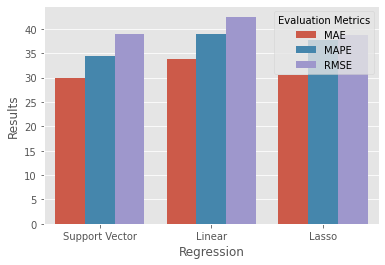

In [120]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

regEval = regEval.stack().reset_index()
regEval.columns = ['Regression', 'Evaluation Metrics', 'Results']
sns.barplot(y='Results', x='Regression', hue='Evaluation Metrics', data=regEval)

In [130]:
for train_indices, test_indices in cv_reg.split(X_reg_sel,y_reg): 
    X_train = X_reg_sel.iloc[train_indices]
    y_train = y_reg.iloc[train_indices]
    
    X_test = X_reg_sel.iloc[test_indices]
    y_test = y_reg.iloc[test_indices]

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  47 tasks      | elapsed:    8.9s
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:   15.3s finished


<Figure size 432x288 with 0 Axes>

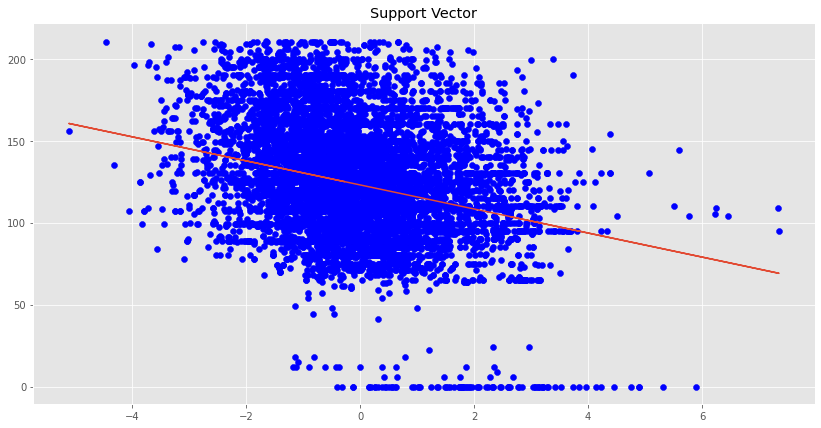

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished


<Figure size 432x288 with 0 Axes>

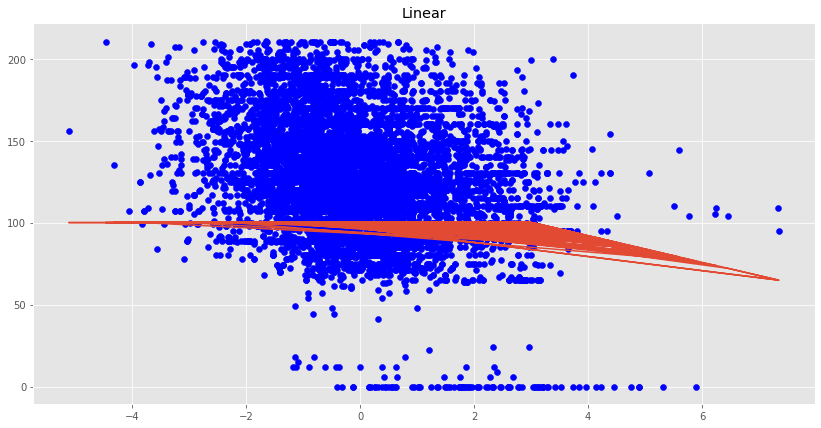

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


<Figure size 432x288 with 0 Axes>

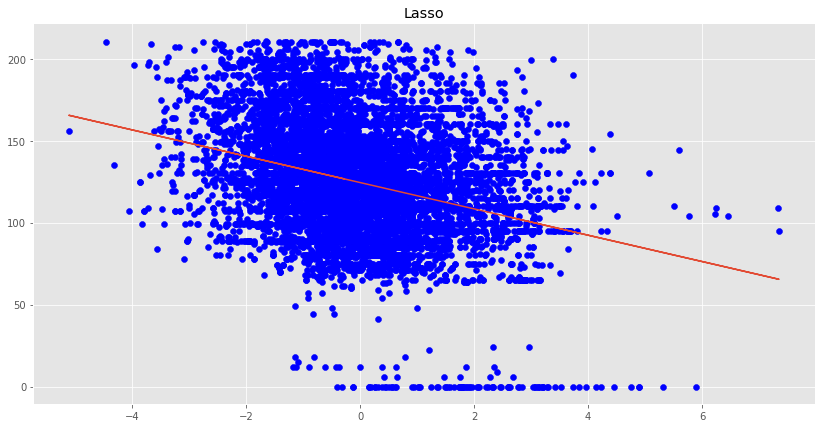

In [140]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
def visual_ml(svr, linear, lasso, X_test, y_test):
    y_test = np.array(y_test, dtype = np.uint)
    pca = PCA(n_components = 1)
    X_test = pca.fit_transform(X_test)
    labels = ['Support Vector',
          'Linear',
          'Lasso']
    
    for clf, lab in zip([svr, linear, lasso], labels):
        plt.figure()
        #fig = plot_decision_regions(X=X_test, y=y_test, clf=clf)
        fig, ax = plt.subplots(figsize=(14, 7))
        ax.plot(X_test, clf.fit(X_test, y_test).predict(X_test))
        ax.scatter(X_test, y_test, color='blue')
        plt.title(lab)
        plt.show()
        plt.close()
visual_ml(svr, linearReg, lassoReg, X_test, y_test)

### Part 5: Model Comparison <a id='model-and-evaluation5'/>

*Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.*

#### ROC

#### Area Under the Curve (AUC)

#### mlxtend (comparing the regression models)

http://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_5x2cv/

#### Statistical approach (using mlxtend), alpha = 0.05
Using the mlxtend package, we delved into the statistical significance in performance difference among different pairs of models. From the results below, __Random forest__ performed significantly better than the rest of the classification models discussed above (KNN, Decision tree, Logistic regression, Naive Bayes). 

##### Random forest vs Naive Bayes
- Compared Random forest(most accurate model) vs Naive Bayes(least accurate model) using the test dataset.
- Since p(0.000) < a (0.05), we __reject__ the null hypothesis that both algorithms perform equally well on the dataset. Thus we find the performance difference between the two models to be __very significant__. 

In [ ]:
# Random forest vs Naive bayes
from mlxtend.evaluate import paired_ttest_5x2cv

for train_indices, test_indices in cv_cls.split(X_cls_sel,y_cls): 
    X_train = X_cls_sel.iloc[train_indices]
    y_train = y_cls.iloc[train_indices]
    
    X_test = X_cls_sel.iloc[test_indices]
    y_test = y_cls.iloc[test_indices]
    
t, p = paired_ttest_5x2cv(estimator1=clf_rf,
                          estimator2=clf_nb,
                          X=X_test, y=y_test,
                          random_seed=10)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

##### KNN vs Naive Bayes
- Compared KNN(Second most accurate model) vs Decision tree(third most accurate model) using the test dataset.
- Since p(0.471) < a (0.05), we __fail to reject__ the null hypothesis that both algorithms perform equally well on the dataset. Thus we find the performance difference between the two models to be __not significant__. 

In [ ]:
# KNN vs Decision tree
from mlxtend.evaluate import paired_ttest_5x2cv

for train_indices, test_indices in cv_cls.split(X_cls_sel,y_cls): 
    X_train = X_cls_sel.iloc[train_indices]
    y_train = y_cls.iloc[train_indices]
    
    X_test = X_cls_sel.iloc[test_indices]
    y_test = y_cls.iloc[test_indices]
    
t, p = paired_ttest_5x2cv(estimator1=clf_knn,
                          estimator2=clf_dt,
                          X=X_test, y=y_test,
                          random_seed=10)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

##### Visualizing mlxtend results with different models

In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def visual_ml(clf_rf, clf_knn, clf_dt, X_test, y_test):
    y_test = np.array(y_test, dtype = np.uint)
    pca = PCA(n_components = 2)
    X_test = pca.fit_transform(X_test)
    eclf = EnsembleVoteClassifier(clfs = [clf_rf, clf_knn, clf_dt], verbose = 2)
    labels = ['Random Forest',
          'KNN',
          'Decision Tree',
          'Ensemble']
    for clf, lab in zip([clf_rf, clf_knn, clf_dt, eclf], labels):
        clf.fit(X_test, y_test)
        plt.figure()
        fig = plot_decision_regions(X=X_test, y=y_test, clf=clf)
        plt.title(lab)
        plt.show()
        plt.close()
visual_ml(clf_rf, clf_knn, clf_dt, X_test, y_test)

### Part 6: Feature Importance <a id='model-and-evaluation6'/>

###### Which attributes from your analysis are most important?
###### Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.*


# Deployment <a id='deployment'/>

###### How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?
###### How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? 
###### What other data should be collected? 
###### How often would the model need to be updated, etc.?*

- In order to tackle the uncertainty arising from booking cancellations, machine learning models for the prediction of a booking’s cancellation were developed. 
- Booking cancellation models will help identify the likelihood of bookings cancellations and enable hotel managers to take preventative measures to avoid these potential cancellations. The measures could be offering services, discounts and other perks. 
- The prediction model enable hotel managers to mitigate revenue loss derived from booking cancellations and to mitigate the risks associated with overbooking and this can be mitigated with reallocation costs, cash or service compensations.

# Exceptional Work <a id='exceptional-work'/>

*You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?*